## EDA E-commerce Analytics

### Fonte dos dados

### Preparação do ambiente

In [33]:
# Imports
import pandas as pd
import seaborn as sns
from numpy import fill_diagonal
import matplotlib.pyplot as plt
from matplotlib import rc_params
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Área de plotagem

plt.rcParams['figure.figsize'] = 10,5
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10


In [10]:
# Função para explorar o diretório
import os
def listFile():
    diretorio = os.getcwd()
    if os.path.isdir(diretorio):
        arquivo = [arquivo for arquivo in os.listdir(diretorio) if os.path.isfile(os.path.join(diretorio, arquivo))]
        for i in arquivo:
            print(i)

In [12]:
listFile()

dataset.csv
Untitled.ipynb


### Carga dos dados

In [13]:
# Carga
dados = pd.read_csv("dataset.csv")

In [14]:
# Visualização
dados.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [16]:
# Dimensões
dados.shape

(11000, 12)

In [17]:
# Metadados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Análise

**Dados numéricos**

In [15]:
# Definindo labels das vairáveis numéricas
# ID será excluído da lista de labels por não representar informação numérica
# entregue_no_prazo será excluído por ser a variável target do futuro modelo - analisaremos separadamente

numercVars = dados.select_dtypes(include = 'int64').columns.drop(['ID', 'entregue_no_prazo'])
numercVars

Index(['numero_chamadas_cliente', 'avaliacao_cliente', 'custo_produto',
       'compras_anteriores', 'desconto', 'peso_gramas'],
      dtype='object')

#### Univariada

In [18]:
# Estatísticas básicas
dados[numercVars].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


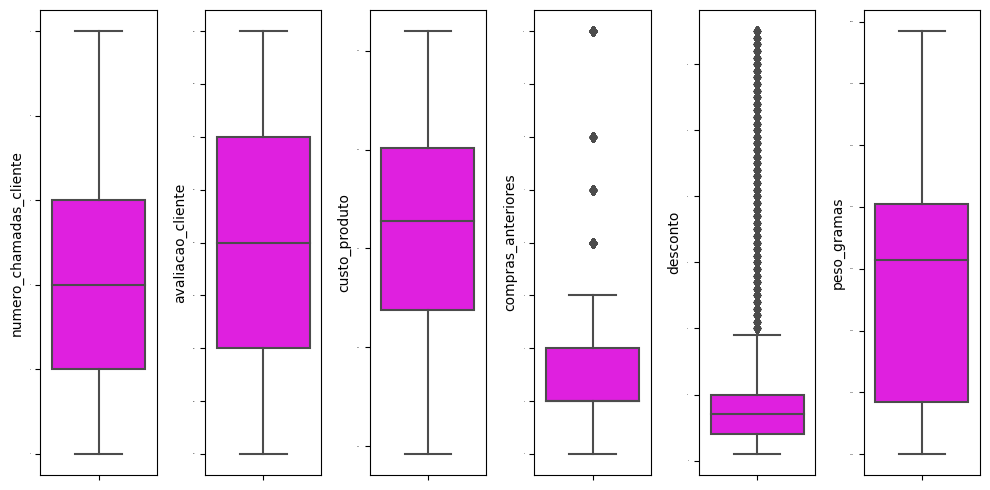

In [23]:
# Boxplot
for i, var in enumerate(numercVars):
    
    plt.subplot(1, len(numercVars), i + 1)
    
    sns.boxplot(y = dados[var], color = 'magenta', orient= 'v')
    
    plt.tight_layout()

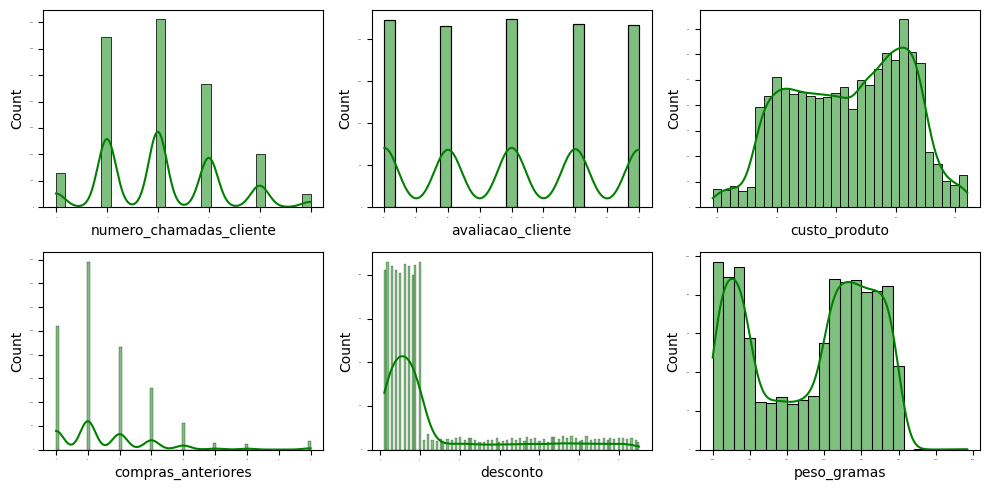

In [25]:
# Hitograma
for i, var in enumerate(numercVars):
    plt.subplot(2, int(len(numercVars)/ 2), i + 1)
    
    sns.histplot(dados[var], color = 'green', kde = True)
    
    plt.tight_layout()

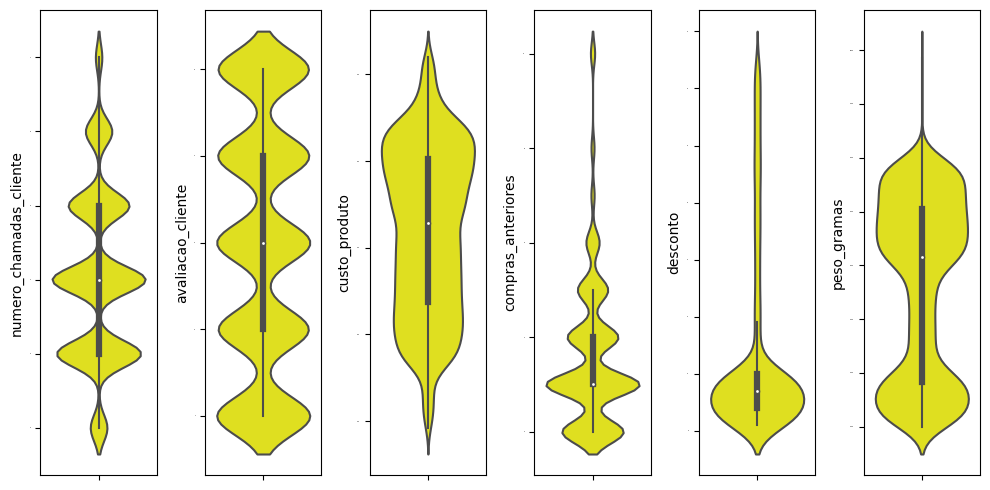

In [28]:
# ViolinPlot

for i, var in enumerate(numercVars):
    plt.subplot(1, len(numercVars), i + 1)
    
    sns.violinplot(y = dados[var], color = 'yellow')
    
    plt.tight_layout()

#### Bivariada

In [29]:
# Correlação
corr = dados[numercVars].corr()
corr

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


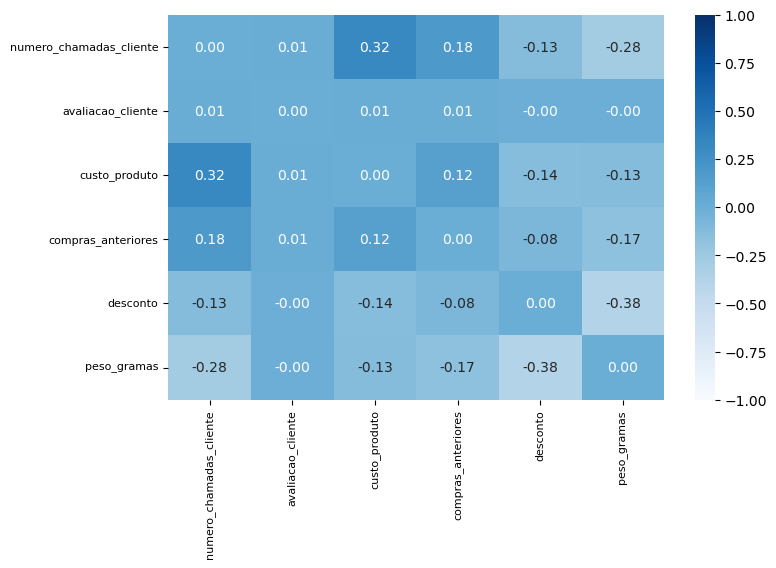

In [52]:
# Gráfico - mapa de calor
fill_diagonal(corr.values, 0)
plt.figure(figsize=(8,5))
sns.heatmap(data=corr, 
            annot= True, 
            cmap= "Blues", 
            fmt= '.2f', 
            vmax=1, 
            vmin=-1)
plt.xticks(size = 8)
plt.yticks(size = 8);

### Análise

**Dados categóricos**

In [54]:
categoricVar = dados.select_dtypes(include = 'object').columns
categoricVar

Index(['corredor_armazem', 'modo_envio', 'prioridade_produto', 'genero'], dtype='object')

**Univariada**

In [55]:
# Sumário estatístico
dados[categoricVar].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [57]:
# Valores únicos
for var in categoricVar:
    print("Frequência da variável: ", var)
    print(dados[var].value_counts())
    print("-------")

Frequência da variável:  corredor_armazem
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64
-------
Frequência da variável:  modo_envio
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64
-------
Frequência da variável:  prioridade_produto
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64
-------
Frequência da variável:  genero
F    5546
M    5454
Name: genero, dtype: int64
-------


**Gráficos**


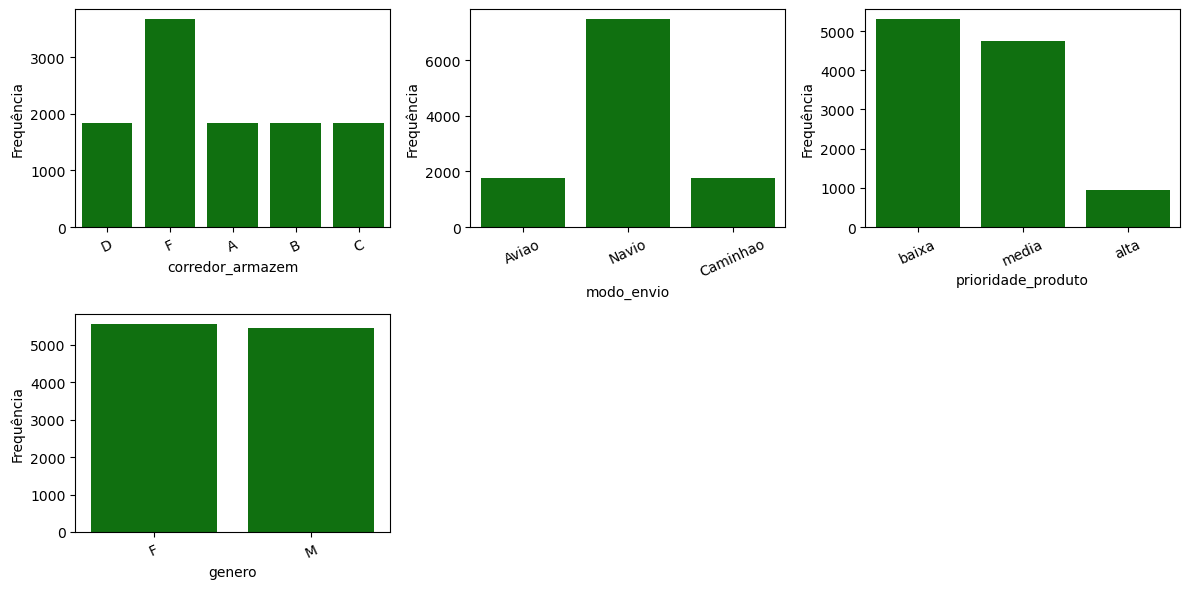

In [82]:
# Frequência das categorias
plt.figure(figsize=(12,6))
for i, var in enumerate(categoricVar):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x = dados[var], color = 'green', orient= "v")
    plt.xticks(rotation = 25, size = 10)
    plt.ylabel("Frequência")
    plt.tight_layout()

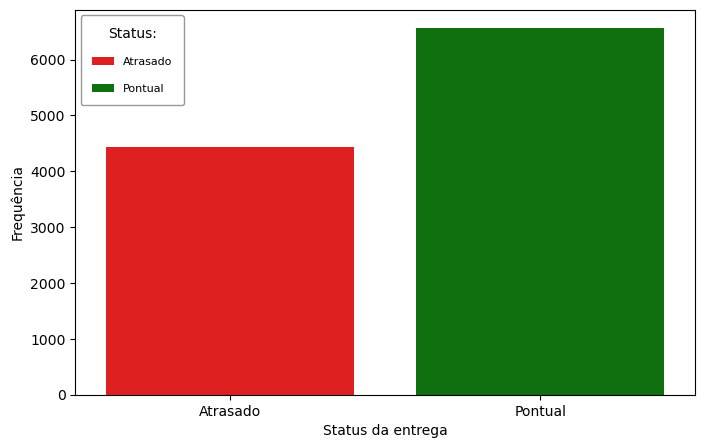

In [104]:
# Observação - variável alvo
plt.figure(figsize=(8,5))
ax = sns.countplot(data = dados, x = 'entregue_no_prazo', palette=["red", "green"])
plt.xlabel("Status da entrega")
ax.set_xticklabels(["Atrasado", "Pontual"])
plt.ylabel("Frequência")
ax.legend(title = "Status:", 
          title_fontsize = 10,
          handles = ax.patches, 
          labels = ['Atrasado', 'Pontual'],
          borderpad = 1,
          labelspacing = 1.5,
          fontsize = 8,
          edgecolor = 'gray');

**Bivariada**

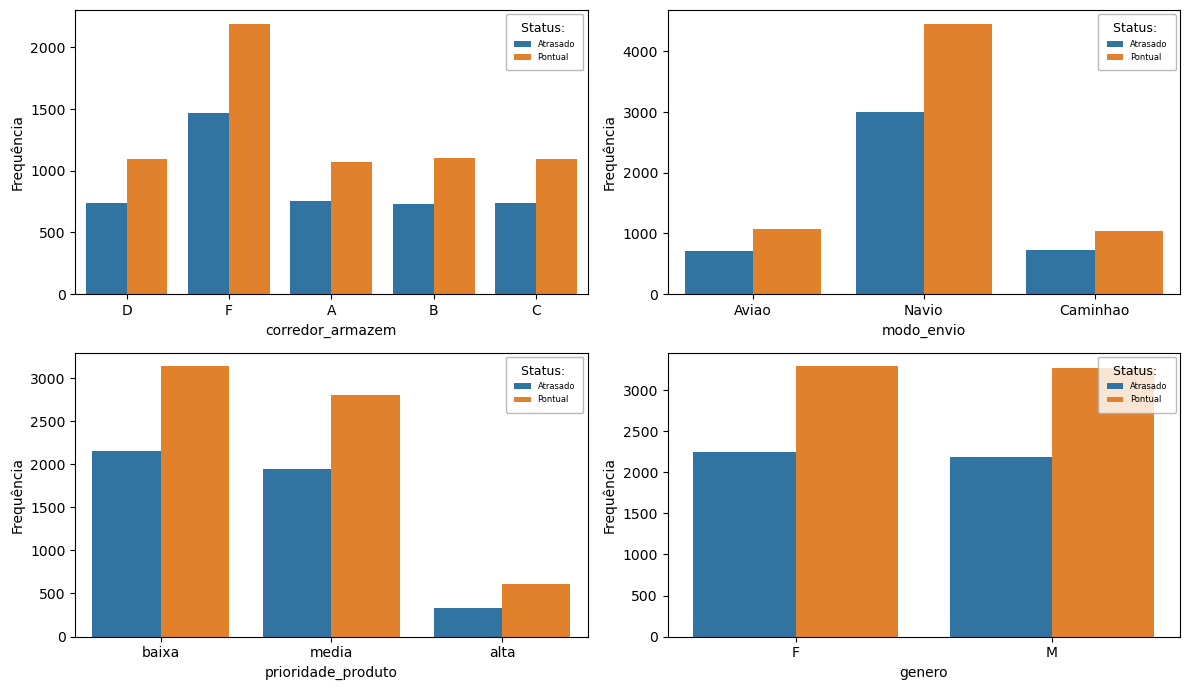

In [110]:
# gráficos
plt.figure(figsize=(12,7))
for i, var in enumerate(categoricVar):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data = dados, x = var, hue = 'entregue_no_prazo')
    plt.ylabel("Frequência")
    plt.legend(title = "Status: ",
               title_fontsize = 9,
              borderpad = 1,
              loc = 'upper right',
              labels=["Atrasado", "Pontual"],
              fontsize = 6,
              edgecolor = 'darkgray')
    plt.tight_layout()

<audio controls>
    <source src="./teste.mp3" type="audio/mpeg">
    Seu navegador não suporta o elemento de áudio.
</audio>


[Ouvir Análise em Áudio](./teste.mp3)
